<a href="https://colab.research.google.com/github/RayedShamim/Google-Play-Store-EDA-Rayed/blob/main/Google_Play_Store_EDA_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

When it comes to mobile platform appstores, Google play store is the one of the most popular appstores with the highest user engagement amoungst others. 

So in this project, we explore the top apps in different categories and the factors involved with app success and engagment such as Reviews, Installs, developer support by providing updates recently, optimized apks for varying versions of operating systems. We also visually analysis and see how sentiments of users are correlated. 

And finally I provide conclusions as to what are the factors every new developer should focus on if they are willing to start an app business.

# **GitHub Link -**

https://github.com/RayedShamim/Google-Play-Store-EDA-Rayed/blob/main/Google_Play_Store_EDA_Submission.ipynb

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

Google Play store is the most popular app store with over 3.5 million apps. The Play store generates billions of dollars in revenue which makes it the most competitive yet lucrative place for developers to upload apps.

In this app store, users can download apps from a variety of genres. Most of the apps on this appstore are free, yet many developers tend to add small adverts into the app or have an In-app purchase options which provides extra features and functionality to the user. This helps the developer to make money in return.

So, the greater number of positive reviews and installs an app will have, the greater chances a developer will make money. So, we are going to see what are the key factors which helps in engagement of users in apps.

#### **Define Your Business Objective?**

**To discover key factors responsible for app engagement and success.**



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [2]:
# Loading Dataset

file1 = 'https://raw.githubusercontent.com/RayedShamim/Google-Play-Store-EDA-Rayed/main/Play%20Store%20Data.csv'
file2 = 'https://raw.githubusercontent.com/RayedShamim/Google-Play-Store-EDA-Rayed/main/User%20Reviews.csv'

#psdf -> abbreviated for Play store dataframe
psdf = pd.read_csv(file1)

#urdf -> abbreviation for User Reviews Dataframe
urdf = pd.read_csv(file2)

### Dataset First View

In [3]:
# Dataset First Look
psdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
urdf.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(psdf.shape,urdf.shape)

(10841, 13) (64295, 5)


### Dataset Information

In [6]:
# Dataset Info
psdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
urdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [8]:
urdf.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(psdf[psdf.duplicated()])

483

In [10]:
len(urdf[urdf['Translated_Review'].duplicated()])

36300

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
psdf.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
urdf.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

<Axes: >

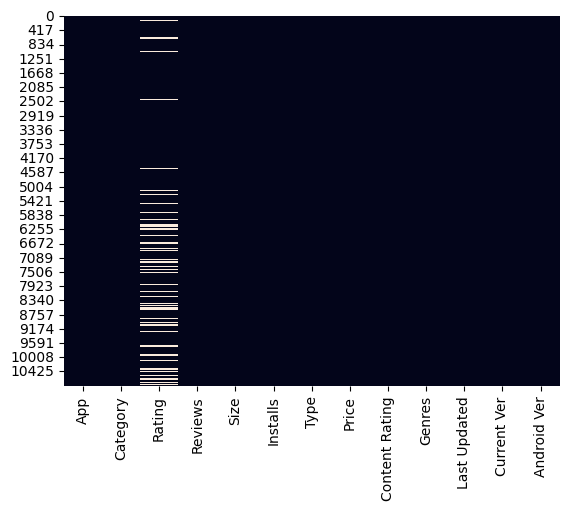

In [13]:
# Visualizing the missing values
sns.heatmap(psdf.isnull(), cbar=False)

<Axes: >

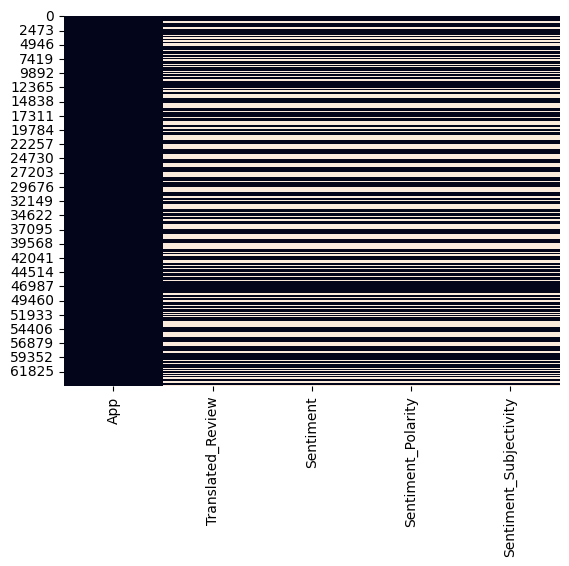

In [14]:
sns.heatmap(urdf.isnull(), cbar=False)

### What did you know about your dataset?

This dataset is of google play store were users installs and ratings are given for each app. More positive ratings means more engagement of the user.A positive rating is considered when a user rates an app 4 stars and above.

We see that Play store dataframe has a variables called rating in which there are ~1400 null values. And in User reviews data frame we have roughly have the dataset as null values.


## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
psdf.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [16]:
urdf.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [17]:
# Dataset Describe
psdf.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [18]:
urdf.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description 

###**Play Store Data**
* **App:** Name of the App
* **Category:** Category type the app belongs to
* **Rating:** Average star ratings for the app
* **Reviews:** Total number of reviews the app contains
* **Size:** Size of the app APK
* **Installs:** Total number of installs
* **Type:** Free/Paid
* **Price:** Price of the app
* **Content Rating:** Suitability for age group
* **Genres:** Genres of the app
* **Last Updated:** tell us how recently the app was updated
* **Current Ver:** Current version of the app apk/aab
* **Android Ver:** Minimum version of the Android OS supported by the app

###**User Reviews**
* **App:** Name of the app
* **Translated_Review:** Review given by the user translated in english
* **Sentiment:** Sentiment of the user(Positive, Negative or Neutral)
* **Sentiment_Polarity:** tells us how positive or negative a review is
* **Sentiment_Subjectivity:** tells us if the review sentiment leans more towards users personal believes or actual facts

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
for cols in psdf:
  print(f'* The unique values in {cols} is {psdf[cols].unique()}.\n')

* The unique values in App is ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology'].

* The unique values in Category is ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9'].

* The unique values in Rating is [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  

In [20]:
# Checking unique values in urdf
for cols in urdf:
  print(f'* The unique number of values in column {cols} is {urdf[cols].nunique()}.\n')

* The unique number of values in column App is 1074.

* The unique number of values in column Translated_Review is 27994.

* The unique number of values in column Sentiment is 3.

* The unique number of values in column Sentiment_Polarity is 5410.

* The unique number of values in column Sentiment_Subjectivity is 4474.



## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.

# Filtering out na values and removing duplicates
filtered_psdf = psdf.dropna(axis=0)
filtered_psdf = filtered_psdf.drop_duplicates('App')

filtered_urdf = urdf.dropna(axis=0)
filtered_urdf = filtered_urdf.drop_duplicates('Translated_Review')

In [22]:
filtered_psdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   object 
 4   Size            8190 non-null   object 
 5   Installs        8190 non-null   object 
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   object 
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
dtypes: float64(1), object(12)
memory usage: 895.8+ KB


<Axes: >

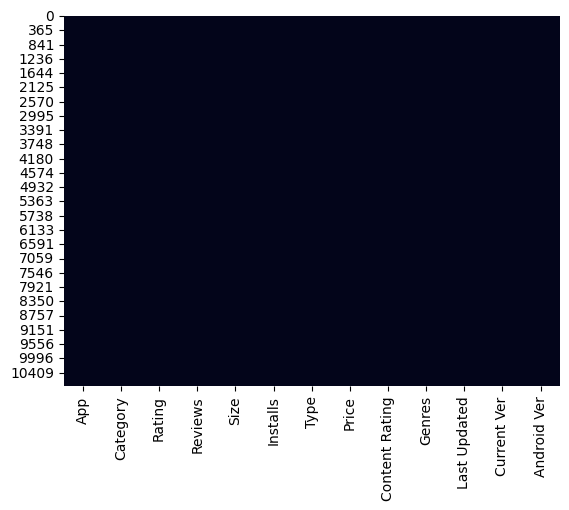

In [23]:
# checking visually if there is any null values left
sns.heatmap(filtered_psdf.isnull(), cbar=False)

<Axes: >

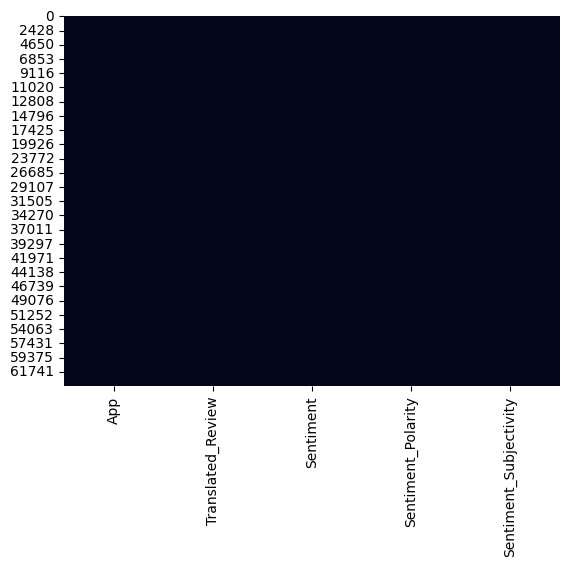

In [24]:
sns.heatmap(filtered_urdf.isnull(), cbar=False)

In [25]:
# Filtering outliers
filtered_psdf = filtered_psdf[(filtered_psdf['Rating'] <= 5) & (filtered_psdf['Rating'] >= 0)]

In [26]:
# finding top categories with highest total number of apps
print('The top catergories with highest total number of apps are: -')

filtered_psdf['Category'].value_counts()

The top catergories with highest total number of apps are: -


FAMILY                 1607
GAME                    912
TOOLS                   717
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         296
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [27]:
#Converting formats of various features of dataset
def convertPrice(myString):
  if '$' in myString:
    myString = float(myString.replace("$",''))
  else:
    myString = 0.0

  return myString

filtered_psdf['Reviews'] = filtered_psdf['Reviews'].astype(int)

filtered_psdf['Converted Price'] = filtered_psdf['Price'].apply(lambda x: convertPrice(x))

def convertSize(size):
  if 'M' in size:
    size = float(size.replace('M',''))
  elif 'K' in size:
    size = float(size.replace('K',''))/1000
  elif '+' in size:
    size = float(size.replace('+',''))
  else:
    size = 0.0

  return size

filtered_psdf['App Size'] = filtered_psdf['Size'].apply(lambda x: convertSize(x))

filtered_psdf['Updated On'] = filtered_psdf['Last Updated'].apply(lambda x: datetime.strptime(x,'%B %d, %Y'))

# Finding total number of reviews in each category
category_review_sum = filtered_psdf.groupby('Category').agg({'Reviews':'sum'}).sort_values(by='Reviews',ascending=False)
category_review_sum

,Reviews
Category,
GAME,622295937
COMMUNICATION,285810907
TOOLS,229351692
SOCIAL,227927470
FAMILY,143822125
PHOTOGRAPHY,105351227
VIDEO_PLAYERS,67484072
PRODUCTIVITY,55590391
PERSONALIZATION,53542336


In [28]:
# Finding apps with highest average user engagement in top categories
category_reivews = filtered_psdf.groupby('Category')['Reviews'].mean().reset_index()
category_reivews.rename(columns = {'Reviews':'avg_reviews'}, inplace=True)
category_reivews = category_reivews.sort_values('avg_reviews',ascending=False)
category_reivews

,Category,avg_reviews
27,SOCIAL,1.122795e+06
6,COMMUNICATION,1.116449e+06
14,GAME,6.823420e+05
31,VIDEO_PLAYERS,4.559735e+05
24,PHOTOGRAPHY,4.005750e+05
9,ENTERTAINMENT,3.408103e+05
29,TOOLS,3.198768e+05
26,SHOPPING,2.475086e+05
25,PRODUCTIVITY,1.846857e+05
23,PERSONALIZATION,1.808863e+05


In [29]:
cat1 = category_reivews['Category'].iloc[0]
cat2 = category_reivews['Category'].iloc[1]
cat3 = category_reivews['Category'].iloc[2]
print(f'The top 3 categories with highest average app reviews are {cat1}, {cat2} & {cat3}.')

The top 3 categories with highest average app reviews are SOCIAL, COMMUNICATION & GAME.


In [30]:
#apps OS version support range
def checkApk(version_support):
  if 'and up' in version_support:
    return 'Single APK'
  elif 'Varies with device' in version_support:
    return 'Multiple APK'
  else:
    return 'Limited Versions APK'


filtered_psdf['APK Support Range'] = filtered_psdf['Android Ver'].apply(lambda x: checkApk(x))

In [31]:
def findMinimum(version):
  if 'and up' in version:
    return version.replace('and up','')
  elif '-'in version:
    return version[:version.find('-')]
  else:
    return version


filtered_psdf['Minimum Android Ver'] = filtered_psdf['Android Ver'].apply(lambda x: findMinimum(x))

In [32]:
communication_df = filtered_psdf[filtered_psdf['Category'] == 'COMMUNICATION']
communication_df.sort_values(by = 'Reviews',ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Converted Price,App Size,Updated On,APK Support Range,Minimum Android Ver
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0.0,0.0,2018-08-03,Multiple APK,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,0.0,0.0,2018-08-01,Multiple APK,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up,0.0,40.0,2018-08-02,Single APK,4.0
406,BBM - Free Calls & Messages,COMMUNICATION,4.3,12842860,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up,0.0,0.0,2018-08-02,Single APK,4.0.3
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device,0.0,0.0,2018-07-18,Multiple APK,Varies with device


In [33]:
social_df = filtered_psdf[filtered_psdf['Category'] == 'SOCIAL']
socialApp = social_df.sort_values(by = 'Reviews',ascending=False).iloc[0]['App']
appRating = social_df.sort_values(by = 'Reviews',ascending=False).iloc[0]['Rating']

print(f"{socialApp} is the most reviewed app in SOCIAL category, with total reviews of approximately {social_df.sort_values(by = 'Reviews',ascending=False).iloc[0]['Reviews']}.")
print(f"This app has a average rating of {appRating} and is {social_df.sort_values(by = 'Reviews',ascending=False).iloc[0]['Type']}")
print(' ')
print(f"The second and third apps in this category are {social_df.sort_values(by = 'Reviews',ascending=False).iloc[1]['App']} and {social_df.sort_values(by = 'Reviews',ascending=False).iloc[2]['App']}")

Facebook is the most reviewed app in SOCIAL category, with total reviews of approximately 78158306.
This app has a average rating of 4.1 and is Free
 
The second and third apps in this category are Instagram and Snapchat


In [34]:
games_df = filtered_psdf[filtered_psdf['Category'] == 'GAME']

gamesApp = games_df.sort_values(by = 'Reviews',ascending=False).iloc[0]['App']
ratingApp = games_df.sort_values(by = 'Reviews',ascending=False).iloc[0]['Rating']
print(f"{gamesApp} is the most reviewed app in GAME category, with total reviews of approximately {games_df.sort_values(by = 'Reviews',ascending=False).iloc[0]['Reviews']}")
print(f"This app has an average rating of {ratingApp} and is {games_df.sort_values(by = 'Reviews',ascending=False).iloc[0]['Type']}")
print(' ')
print(f"The second and third apps in this category are {games_df.sort_values(by = 'Reviews',ascending=False).iloc[1]['App']} and {games_df.sort_values(by = 'Reviews',ascending=False).iloc[2]['App']}")

Clash of Clans is the most reviewed app in GAME category, with total reviews of approximately 44891723
This app has an average rating of 4.6 and is Free
 
The second and third apps in this category are Subway Surfers and Clash Royale


In [35]:
#recently updated apps amoungst top 3 genre apps[entire rows]
last_update_df = pd.concat([games_df.sort_values(by = 'Reviews',ascending=False).head(10),
                               social_df.sort_values(by = 'Reviews',ascending=False).head(10),
                               communication_df.sort_values(by = 'Reviews',ascending=False).head(10)],axis=0).sort_values(by='Updated On')

last_update_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Converted Price,App Size,Updated On,APK Support Range,Minimum Android Ver
1662,Pou,GAME,4.3,10485308,24M,"500,000,000+",Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up,0.0,24.0,2018-05-25,Single APK,4.0
1660,Clash Royale,GAME,4.6,23133508,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up,0.0,97.0,2018-06-27,Single APK,4.1
1932,Shadow Fight 2,GAME,4.6,10979062,88M,"100,000,000+",Free,0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up,0.0,88.0,2018-07-02,Single APK,3.0
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,0.0,74.0,2018-07-05,Single APK,4.1
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,0.0,76.0,2018-07-12,Single APK,4.1
1694,Minion Rush: Despicable Me Official Game,GAME,4.5,10216538,Varies with device,"100,000,000+",Free,0,Everyone 10+,Casual;Action & Adventure,"July 12, 2018",Varies with device,Varies with device,0.0,0.0,2018-07-12,Multiple APK,Varies with device
1670,Clash of Clans,GAME,4.6,44891723,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,0.0,98.0,2018-07-15,Single APK,4.1
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device,0.0,0.0,2018-07-18,Multiple APK,Varies with device
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up,0.0,0.0,2018-07-19,Single APK,4.1
1764,Pokémon GO,GAME,4.1,10424925,85M,"100,000,000+",Free,0,Everyone,Adventure,"July 23, 2018",0.111.3,4.4 and up,0.0,85.0,2018-07-23,Single APK,4.4


In [36]:
#Converting Installs feature from str to int
def convertInstalls(installs):
  return int(installs.replace('+','').replace(',',''))

filtered_psdf['Installs']=filtered_psdf['Installs'].apply(lambda x: convertInstalls(x))
last_update_df['Installs']=last_update_df['Installs'].apply(lambda x: convertInstalls(x))

In [37]:
print('Average values of user Rating, Reviews, Installs and Updated On for different kinds of APK support: -')
print(' ')

filtered_psdf.groupby('APK Support Range').agg({'Rating':'mean','Reviews':'mean','Installs':'mean','Updated On':'mean'})

Average values of user Rating, Reviews, Installs and Updated On for different kinds of APK support: -
 


,Rating,Reviews,Installs,Updated On
APK Support Range,,,,
Limited Versions APK,4.357143,199479.285714,1.943000e+07,2018-01-07 20:34:17.142857216
Multiple APK,4.250475,998418.392819,4.126528e+07,2018-03-30 17:44:24.836325120
Single APK,4.163046,158252.856965,4.961481e+06,2017-10-17 06:49:57.014925568


In [38]:
print('Max values of user Rating, Reviews, Installs and Updated On for different kinds of APK support: -')
print(' ')

last_update_df.groupby('APK Support Range').agg({'Rating':'max','Reviews':'max','Installs':'max','Updated On':'max'})

print('As we can see, the top apps in top categories don\'t have Limited Version apk.')
last_update_df

Max values of user Rating, Reviews, Installs and Updated On for different kinds of APK support: -
 
As we can see, the top apps in top categories don't have Limited Version apk.


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Converted Price,App Size,Updated On,APK Support Range,Minimum Android Ver
1662,Pou,GAME,4.3,10485308,24M,500000000,Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up,0.0,24.0,2018-05-25,Single APK,4.0
1660,Clash Royale,GAME,4.6,23133508,97M,100000000,Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up,0.0,97.0,2018-06-27,Single APK,4.1
1932,Shadow Fight 2,GAME,4.6,10979062,88M,100000000,Free,0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up,0.0,88.0,2018-07-02,Single APK,3.0
1655,Candy Crush Saga,GAME,4.4,22426677,74M,500000000,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,0.0,74.0,2018-07-05,Single APK,4.1
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,0.0,76.0,2018-07-12,Single APK,4.1
1694,Minion Rush: Despicable Me Official Game,GAME,4.5,10216538,Varies with device,100000000,Free,0,Everyone 10+,Casual;Action & Adventure,"July 12, 2018",Varies with device,Varies with device,0.0,0.0,2018-07-12,Multiple APK,Varies with device
1670,Clash of Clans,GAME,4.6,44891723,98M,100000000,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,0.0,98.0,2018-07-15,Single APK,4.1
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,500000000,Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device,0.0,0.0,2018-07-18,Multiple APK,Varies with device
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,500000000,Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up,0.0,0.0,2018-07-19,Single APK,4.1
1764,Pokémon GO,GAME,4.1,10424925,85M,100000000,Free,0,Everyone,Adventure,"July 23, 2018",0.111.3,4.4 and up,0.0,85.0,2018-07-23,Single APK,4.4


In [39]:
filtered_urdf['App'].value_counts().head(10)

Facebook                        129
Episode - Choose Your Story     123
Angry Birds Classic             107
Google Photos                   101
8fit Workouts & Meal Planner    100
Calorie Counter - Macros        100
ColorNote Notepad Notes          99
Adobe Acrobat Reader             98
Be A Legend: Soccer              98
DRAGON BALL LEGENDS              97
Name: App, dtype: int64

In [40]:
#Merging both data set on LEFT if Null to obtain the list of reviews for each apps.

reviews_df = pd.merge(last_update_df[["App","Category"]],filtered_urdf,how="left",left_on="App",right_on="App")
reviews_df = reviews_df[(reviews_df['App'] == 'Facebook') | (reviews_df['App'] == 'Clash of Clans') | (reviews_df['App'] == 'BBM - Free Calls & Messages')]

In [41]:
reviews_df.groupby(['App','Sentiment'])['Sentiment'].count().unstack()

Sentiment,Negative,Neutral,Positive
App,,,
BBM - Free Calls & Messages,8.0,9.0,16.0
Clash of Clans,9.0,NaN,23.0
Facebook,59.0,18.0,52.0


In [42]:
temp_df = reviews_df.groupby('App').agg({'Sentiment_Polarity':'mean','Sentiment_Subjectivity':'mean'}).dropna()


In [43]:
print(f'Since we see that Facebook, which is the most reviewed app in SOCIAL category has NEGATIVE sentiments more prevailant than positive sentiments.')
print(" ")
print(f'Also we see that Clash of Clans and BBM - Free Calls & Messages have POSITIVE Sentiments more prevailant than negative sentiments.')
print(" ")
print(f'Hence we look at 5 most NEGATIVELY rated reviews of Facebook in order understand the problems faced by the users')


Since we see that Facebook, which is the most reviewed app in SOCIAL category has NEGATIVE sentiments more prevailant than positive sentiments.
 
Also we see that Clash of Clans and BBM - Free Calls & Messages have POSITIVE Sentiments more prevailant than negative sentiments.
 
Hence we look at 5 most NEGATIVELY rated reviews of Facebook in order understand the problems faced by the users


In [44]:
# Getting top five NEGATIVE reviews of Facebook: -
print('Top 5 NEGATIVE Facebook reviews: -')
print('')

temp_df = reviews_df[(reviews_df['App'] == "Facebook") & (reviews_df['Sentiment_Subjectivity'] <= 0.5)].sort_values(by='Sentiment_Polarity').head()

for ele in temp_df['Translated_Review']:
  print(ele)
  print(' ')

Top 5 NEGATIVE Facebook reviews: -

For reason since updates S8+ I longer add pictures via comment. It works I uninstall downgrade. The basis update expect everything improvements get worse. Absolutely useless.....
 
Facebook fails regards ensuring profiles legitimate. Their "community standards" vague pitiful set rules compared determining validity people reported. Were business I would continue using social media. Shame Facebook allowing people create fake profiles post lies negative things hurt peoples reputations.
 
Well 3 days ago I searched marketplace second hand tv stand daughter's bedroom. Facebook updated today news feed full marketplace posts bloody tv stand anywhere 20 minutes 9 bloody days ago!!! Literally chronological order friends posts would make sort since setting called "recent" Just tv stand poxy tv stand! Do devs really think helpfull???? Marketplace posts news feed standard unless choose turn on. Bloody morons charge app!
 
The consistently slow clearing cache, de

In [45]:
# Getting top five NEGATIVE reviews of Clash of Clans: -
print('Top 5 NEGATIVE Clash of Clans reviews: -')
print('')

temp_df = reviews_df[(reviews_df['App'] == "Clash of Clans") & (reviews_df['Sentiment_Subjectivity'] <= 0.5)].sort_values(by='Sentiment_Polarity').head()

for ele in temp_df['Translated_Review']:
  print(ele)
  print(' ')

Top 5 NEGATIVE Clash of Clans reviews: -

I went back playing Clash Clan. Yesterday I upgraded Level 4 Archen Queen Level 5. Today two hours over. But! When I used gem finish construction immediately Gem lost Dark Elixir gone without upgrading Archer Queen! Please fix return me! 30 Gems 30,000 Dark Elixir My Name Clash Clans (Dark King) Town Hall Lvl. 9
 
I really addicted game. Thanks nice update Town hall 12. As I playing game daily I think something missing add progress bar players profile, know much updates remaining townhall. There list view updates pending town hall. So know get maxed out. thanks
 
Hi supercell I playing Clash Clans 4th February 2016, today 20th July 2018, wich makes 2 years playing every single day. I level 151 TownHall 10 player wich 4200 trophies, I Titan league 3, I LOVE game, abousolutely reccomend EVERYONE. I problem :The matchmaking screwed unfair, I get maximum 10 trophies per attack, I mostly lose 25 minimum defense, please fix
 
This good game, I wish c

In [46]:
# Getting top five NEGATIVE reviews of BBM - Free Calls & Messages: -
print('Top 5 NEGATIVE BBM - Free Calls & Messages reviews: -')
print('')

temp_df = reviews_df[(reviews_df['App'] == "BBM - Free Calls & Messages") & (reviews_df['Sentiment_Subjectivity'] <= 0.5)].sort_values(by='Sentiment_Polarity').head()

for ele in temp_df['Translated_Review']:
  print(ele)
  print(' ')

Top 5 NEGATIVE BBM - Free Calls & Messages reviews: -

Always fail to sign email ... trash apps ...
 
Fails send half time. Support useless. Going give days buhbye. There shortcuts insane. Every messaging shortcuts specific contact. Desktop nice shortcut make easier. If still BB's development little things missed.
 
BBM same. Been using since beginning handled less like trash messaging apps. Too much clutter, much useless nonsense. I prefer simple clever features smooth functionality. BBM Consumer mess
 
Need LITE variant. Please learn FB, Line, Twitter, IG even Google row, lighter version already.
 
Ads + keep invite bbm group Everytime leave
 


### What all manipulations have you done and insights you found?

From my analysis, users on Google play store are mostly engaged in 3 categories namely SOCIAL, COMMUNICATION and GAME. The top apps in these categories have very high number of positive reviews and an average rating of 4.0 or more. They also have a total installs ranging from 500 million to 1 billion or more and are Updated very actively(most recent update is August 2018). These number are not only dependent on category but also the apk quality and developer involvement. Good quality apps are usually those that have apks made for a range of particular Operating system. So, then I dived into Android Version column and created a new column called APK Support Range.

The following table explains how users are more likely to engage: -

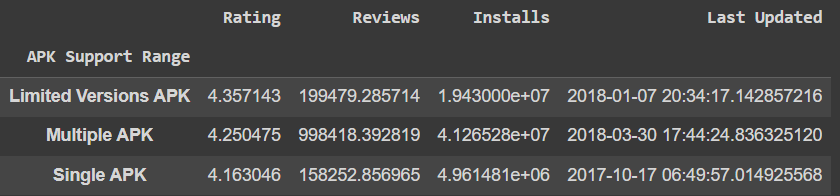

I also learned that the top apps in these category are Facebook, Clash of Clan and WhatsApp in SOCIAL, GAME & COMMUNICATION category. So we deep dive into reviews and sentiments of these apps. Since we didn't had data for whatsapp, the next top reviewed app which is Blackberry messenger is chosen for this analysis.

In the following table, we can see reviews of these top apps: -

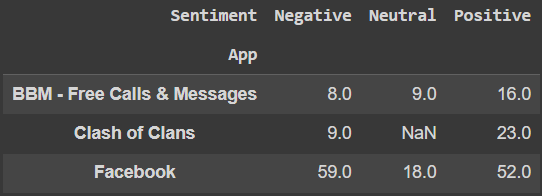

The critical reviews chosen for this analysis was skewed to be less subjective sentiments(having sentiment subjectivity score of less than 0.5). From analysing critic reviews of these Apps, following points are the reason: -

In case of Facebook: - 
* Users were having trouble in using new features whenever the app was updated. 
* Also user were frustrated by enforcing of new features and requested an option to turn features on or off.
* Excessive display of relevant ads on news feed and/or ads were not recent enough for it to be useful for the user.

In case of Clash of Clans: - 
* Some users are having issues with higher level players attacking them while they not being able to do the same.
* Some users are facing glitch with upgrading the Archer Queen character using gems.
* Some users are simply asking for new features even though they are happy with the current app.

In case of BBM - 
* Users are facing multiple issues with app performance and features such as unable to sign in, Cluttering, insufficient support form developers etc.
* Some users are requesting minimal features with more functionality.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Number of Apps per Category (Univariate)

Text(0.5, 1.0, 'Category wise app counts')

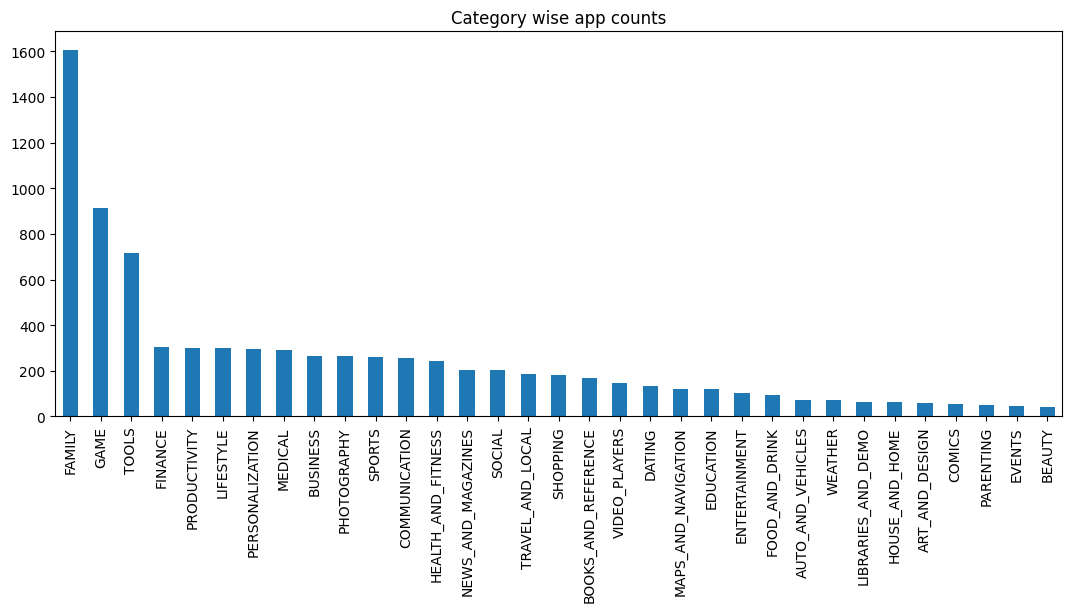

In [47]:
# Chart - 1 Visualization of app count category wise
filtered_psdf['Category'].value_counts().plot(kind='bar',figsize=(13,5))
plt.title("Category wise app counts")

##### 1. Why did you pick the specific chart?

A bar chart is used to show frequency or percentages of variables in a dataset. Hence this chart was used to show the frequency of app uploads in different categories.

##### 2. What is/are the insight(s) found from the chart?

We find the top 3 categories in which most number of apps are uploaded is FAMILY, GAME and TOOLS.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this data will help in deep diving the average number of reviews in each of these Category.

#### Chart - 2 Average Reviews of Categories (Bivariate with Categorical - Numerical)

Text(0.5, 1.0, 'Average Reviews Category wise')

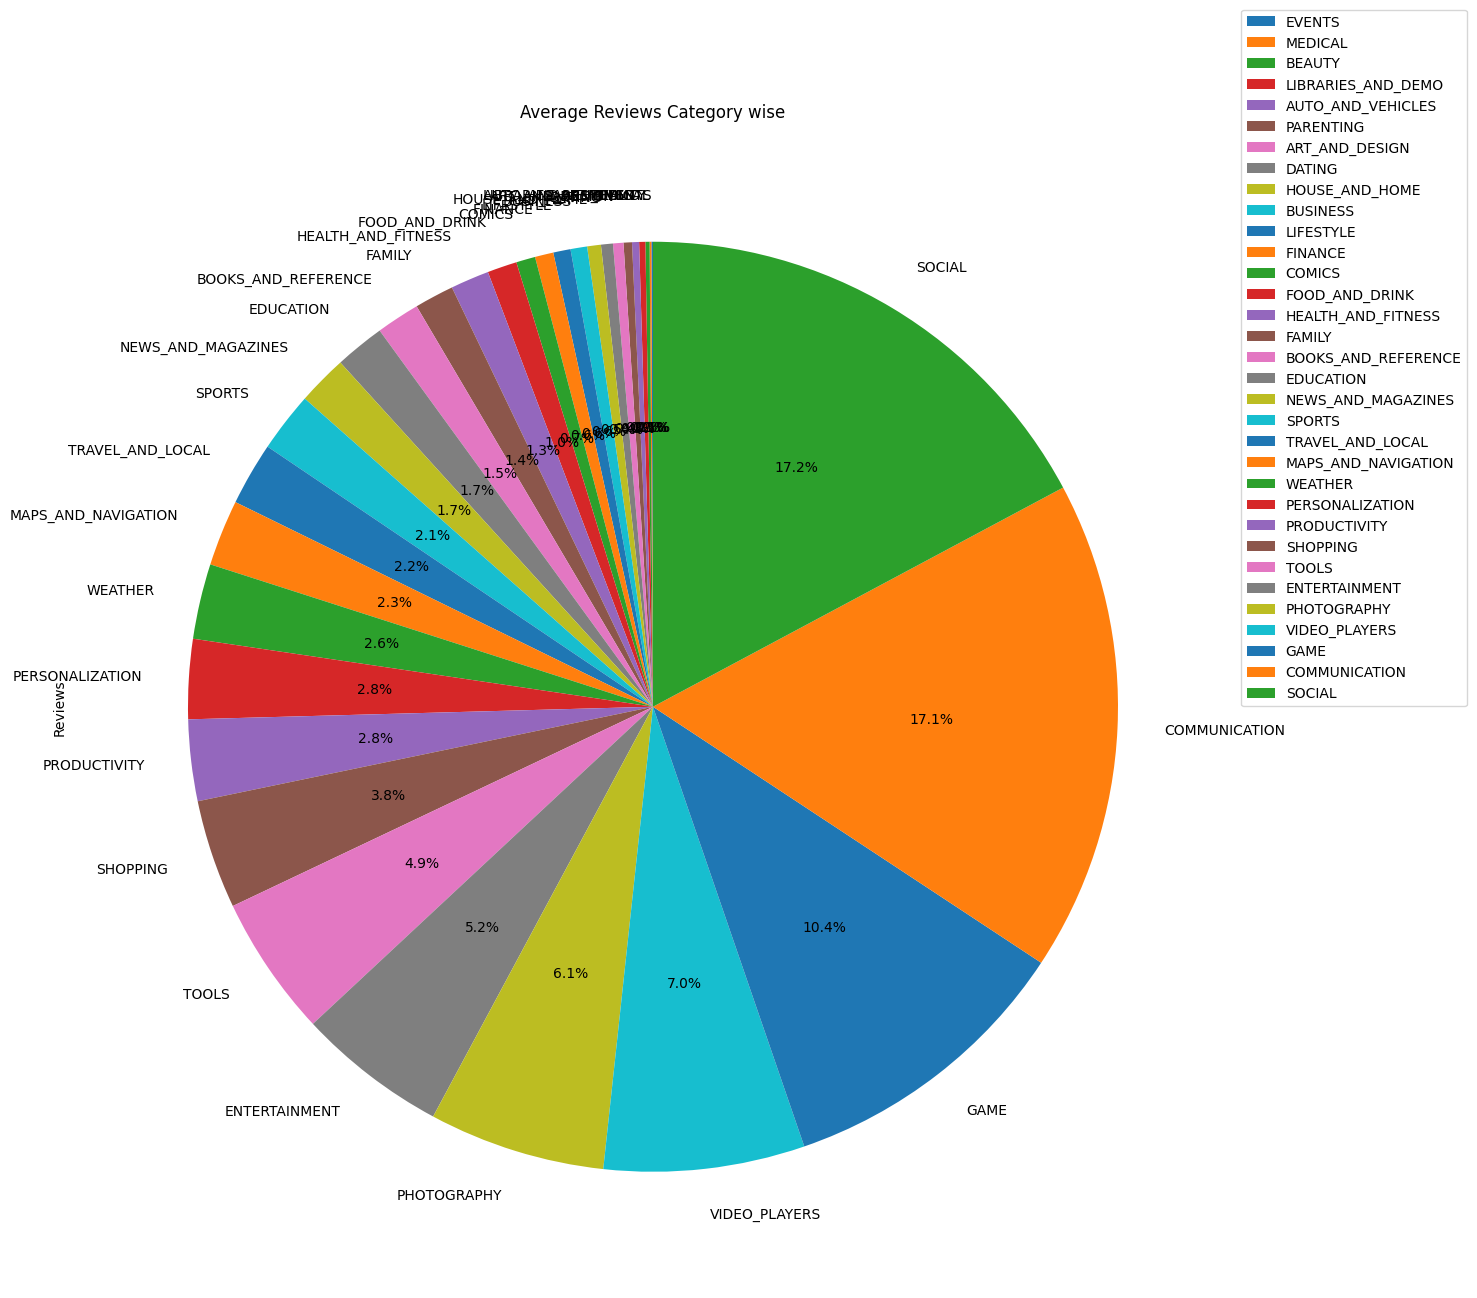

In [48]:
# Chart - 2 visualization of average reviews based on category
filtered_psdf.groupby('Category').agg({'Reviews':'mean'}).sort_values(by='Reviews').plot(kind='pie',
                              figsize=(15,19),
                               autopct="%1.1f%%",
                               startangle=90,
                               subplots=True
                              )
plt.legend(loc='center left',bbox_to_anchor = (1., 0.8))
plt.title('Average Reviews Category wise')

##### 1. Why did you pick the specific chart?

A pie chart is used to show part-in-total values of the dataset. Here we use this chart to show the average value of reviews in every individual Categories.

##### 2. What is/are the insight(s) found from the chart?

We find that highest number of average reviews are present in SOCIAL(17.2 %), COMMUNICATION(17.1 %) and GAME(10.4 %) categories.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Users are mostly engaging in these categories. They could be critical reviews in these categories which other android developing businesses could leverage it to create a new app that would help satisfy the needs of these users. 

#### Chart - 3 - Number of Apps in Free and Paid Category (Bivariate)

,Reviews,Installs
Type,,
Free,274831.482209,9.891699e+06
Paid,10955.081395,9.518352e+04


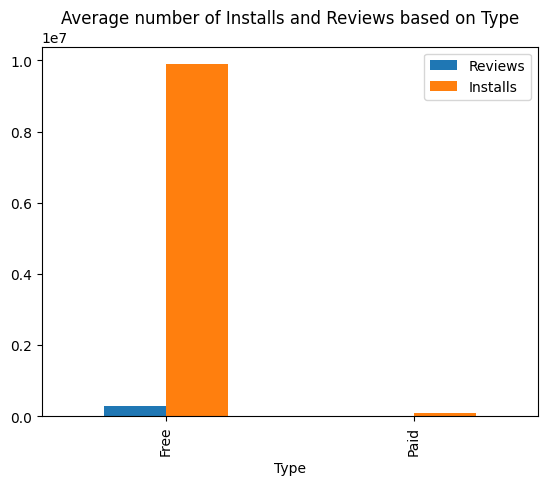

In [49]:
# Chart - 3 

# Visualizing average number of apps based app price category
filtered_psdf.groupby('Type').agg({'Reviews':'mean','Installs':'mean'}).plot(kind='bar')
plt.title("Average number of Installs and Reviews based on Type")

# Price category wise average installs and reviews
filtered_psdf.groupby('Type').agg({'Reviews':'mean','Installs':'mean'})

Text(0, 0.5, 'Number of Apps')

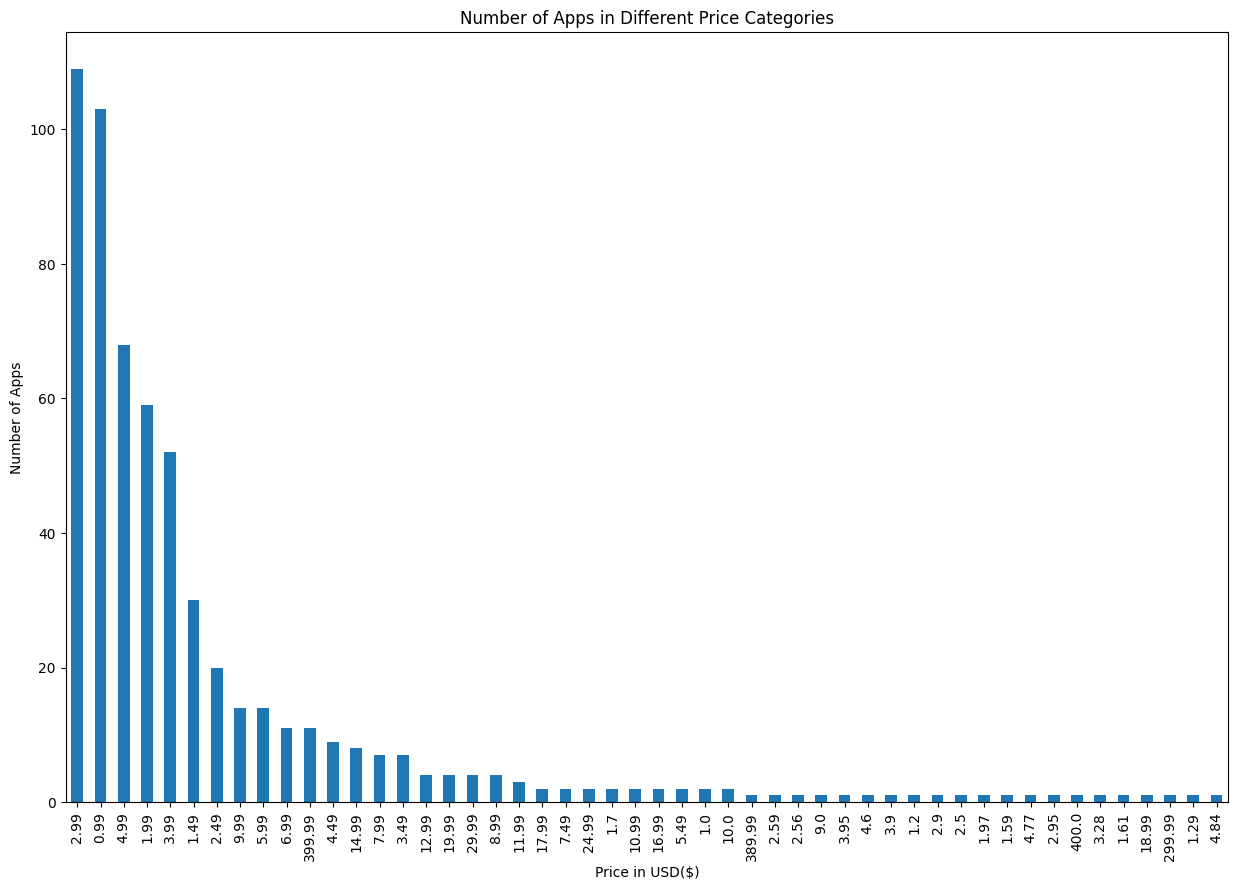

In [50]:
# Visualizing the number of apps in different price category
e1= filtered_psdf[filtered_psdf['Type'] == 'Paid'].sort_values(by='Installs').reset_index()
e1['Converted Price'].value_counts().head(50).plot(kind='bar',figsize=(15,10))
plt.title("Number of Apps in Different Price Categories")
plt.xlabel("Price in USD($)")
plt.ylabel("Number of Apps")

                          Installs
Category                          
GAME                 548074.548387
PHOTOGRAPHY          151500.000000
COMMUNICATION        115288.888889
FAMILY               108733.384615
ENTERTAINMENT        100000.000000
PRODUCTIVITY          92018.333333
HEALTH_AND_FITNESS    83333.333333
TOOLS                 55508.095238
WEATHER               55000.000000
FINANCE               55000.000000
PERSONALIZATION       41919.375000
SHOPPING              10000.000000
BUSINESS              10000.000000
MEDICAL                7938.461538
MAPS_AND_NAVIGATION    7000.000000
TRAVEL_AND_LOCAL       5000.000000
LIFESTYLE              3366.666667
SOCIAL                 3000.000000
BOOKS_AND_REFERENCE    2750.000000
NEWS_AND_MAGAZINES     2750.000000
SPORTS                 2071.428571
VIDEO_PLAYERS          1000.000000


Text(0, 0.5, 'Average Installs')

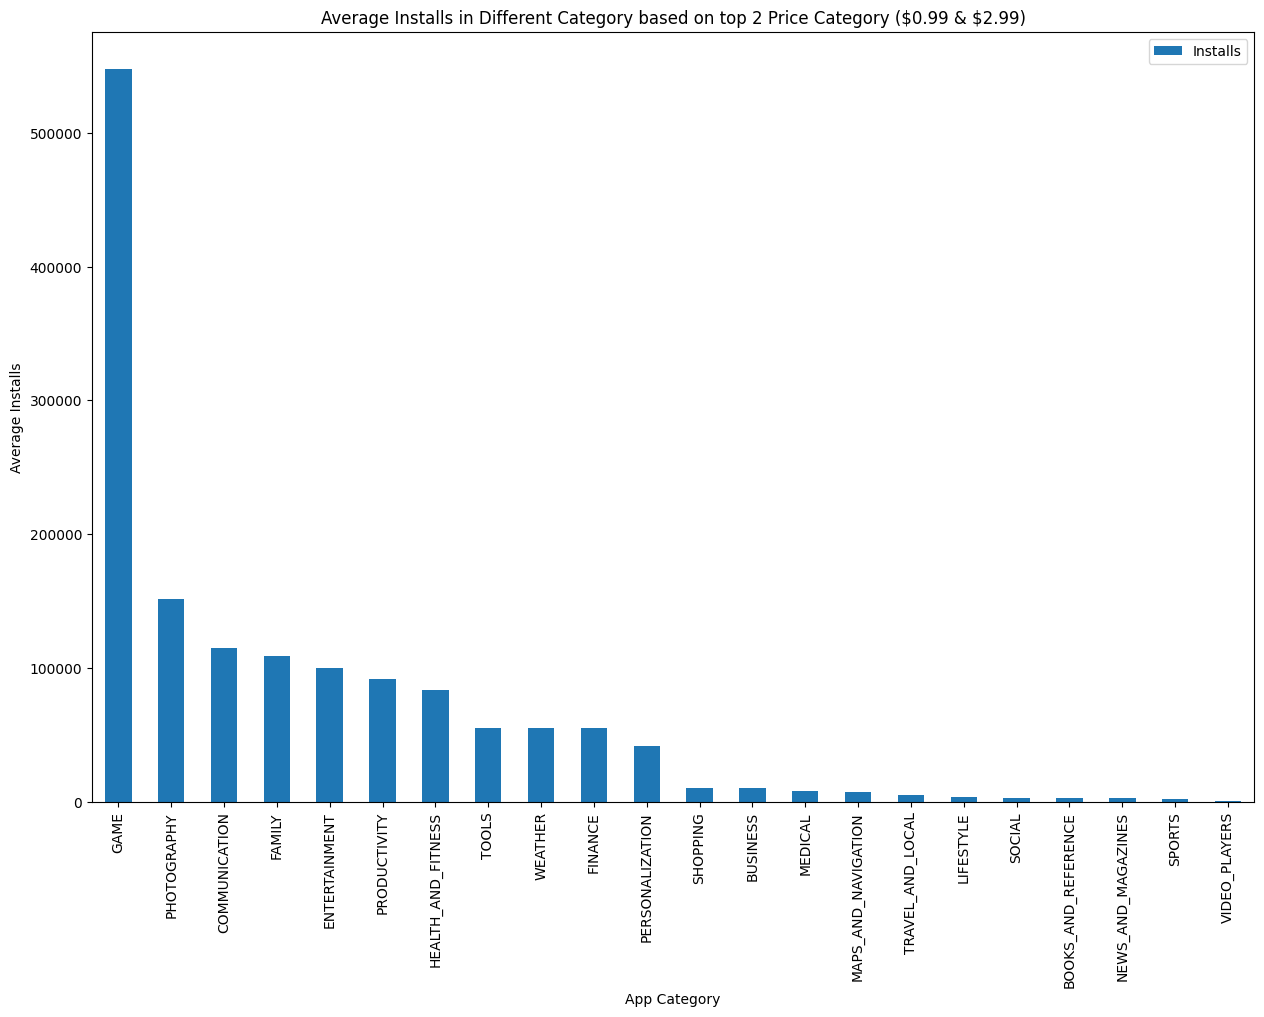

In [51]:
# Visualizing the average installs of different paid categories of price 0.99 and 2.99
r1 = e1[(e1['Converted Price']== 0.99) | (e1['Converted Price']== 2.99)]
print(r1.groupby("Category").agg({"Installs":"mean"}).sort_values(by="Installs",ascending=False))
r1.groupby("Category").agg({"Installs":"mean"}).sort_values(by="Installs",ascending=False).plot(kind='bar',figsize=(15,10))
plt.title("Average Installs in Different Category based on top 2 Price Category (\$0.99 & \$2.99)")
plt.xlabel("App Category")
plt.ylabel("Average Installs")

##### 1. Why did you pick the specific chart?

Bar chart are used to show statistical frequencies or percentages of Categorical datasets. Hence this chart was used to show the average number of Installs and reviews in Free and Paid category of apps.

##### 2. What is/are the insight(s) found from the chart?

We can see that there is a very large number of user base in Free category. And we also see that there is more reviews in Free apps in comparision to paid apps. 

The difference between the Installs and reviews is very large in Free category as compared to Paid category which tells us that users in the free category have lesser tendency to provide feedback. This could also mean that users are satisfied with the offering or can compromise on some feature due to the Free price of the app.

On the other hand we see that the difference between Installs and reviews in the Paid category is not that large, which means, Paid users have more tendency to provide feedback.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, as we can see that largest number of installs are in free category. This can be a great we way to make the app more popular and help the user try out the app at no cost. Also developers in the free category use different strategies to monetize apps by placing ads for extra features and freebies.

On the other hand, in the paid category, the apps are usually priced 0.99 or 2.99 dollars and the most installs in these price categories are games.

#### Chart - 4 Installs and Reviews based on APK support range (Bivariate)

,Installs
APK Support Range,
Limited Versions APK,1.943000e+07
Multiple APK,4.126528e+07
Single APK,4.961481e+06


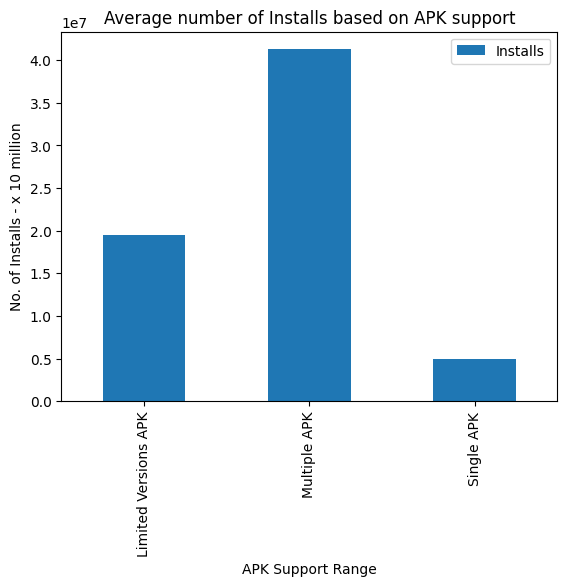

In [52]:
# Chart - 4 Finding the number of installs based on APK support
d1 = filtered_psdf.groupby('APK Support Range').agg({'Installs':'mean'})

d1.plot(kind='bar')
plt.title('Average number of Installs based on APK support')
plt.ylabel('No. of Installs - x 10 million')

d1

,Reviews
APK Support Range,
Limited Versions APK,199479.285714
Multiple APK,998418.392819
Single APK,158252.856965


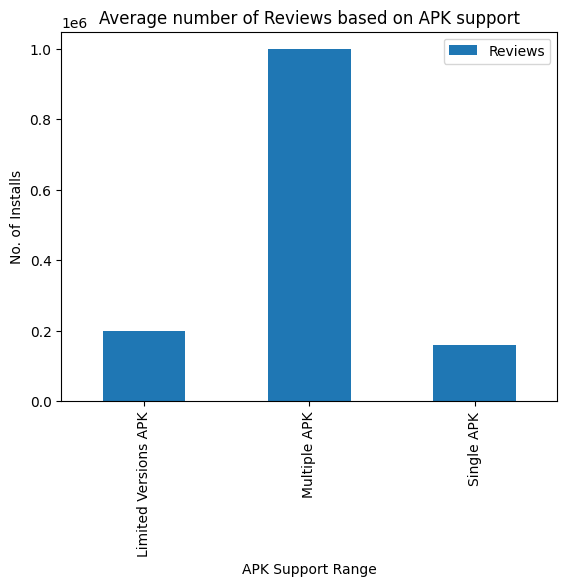

In [53]:
# Finding the number of reviews based on APK support
d2 = filtered_psdf.groupby('APK Support Range').agg({'Reviews':'mean'})

d2.plot(kind='bar')
plt.title('Average number of Reviews based on APK support')
plt.ylabel('No. of Installs')

d2

##### 1. Why did you pick the specific chart?

Bar chart are used to show statistical frequencies or percentages of Categorical datasets. Hence this chart was used to show the average number of Installs and reviews based on APK support.

##### 2. What is/are the insight(s) found from the chart?

The average number of installs are higher on multiple apk support. This shows that the developer is committed to quality and user experience and invests heavily in creating separate apks for different range of Operating systems. This also results in high user satisfaction which is seen in the above graph were reviews are highest in Multiple apk support.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, a positive impact can be made on the business by actively addressing issues form critical reviews and creating APKs if needed to create optimized user experience for different operating systems.

Also we see that developers who opt for limited support or single APK for Operating systems tend to have lesser Installs and reviews.

#### Chart - 5 Average Installs based on Updated On (Univariate + Bivariate)

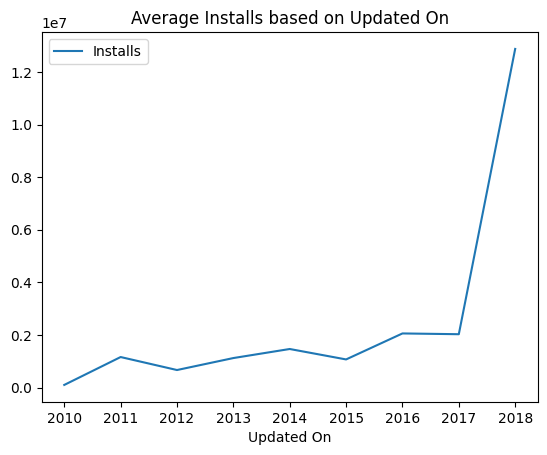

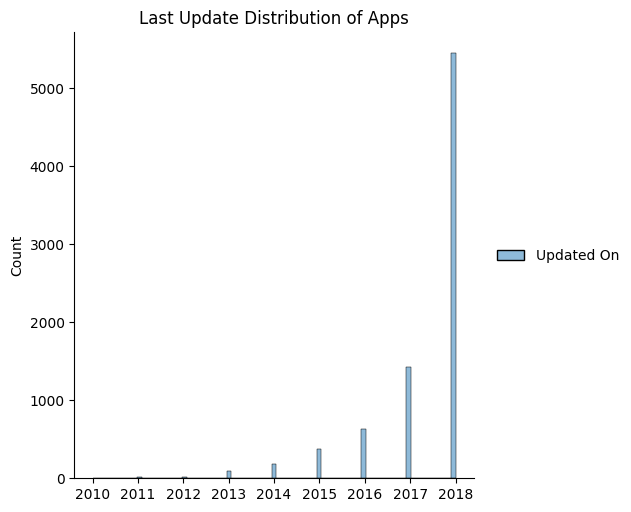

In [54]:
# Chart - 5 Finding the average number of installs based on last update
temp_df = filtered_psdf.copy()

temp_df['Updated On'] = temp_df['Updated On'].apply(lambda x: x.year)
temp = temp_df.groupby("Updated On").agg({"Installs":"mean"}).sort_values(by="Updated On",ascending=False).plot()
plt.title("Average Installs based on Updated On")

# ploting distribution of year of update of apps
temp = temp_df.loc[:,['Updated On']]
sns.displot(temp).set(title='Last Update Distribution of Apps')

Text(0, 0.5, 'Average Reviews')

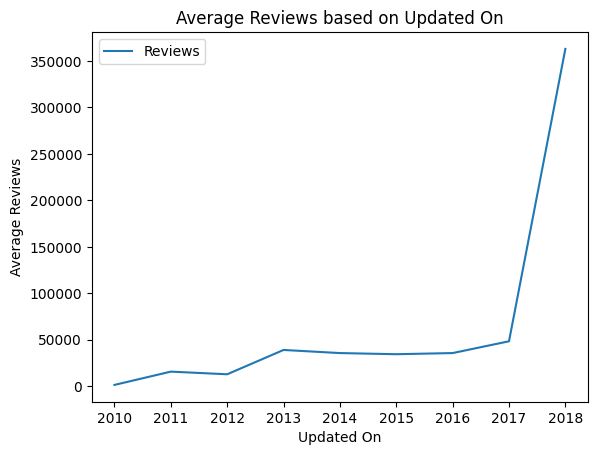

In [55]:
# Displaying the average amount of reviews based on Updated On
temp = temp_df.groupby("Updated On").agg({"Reviews":"mean"}).sort_values(by="Updated On",ascending=False).plot()
plt.title("Average Reviews based on Updated On")
plt.ylabel("Average Reviews")


##### 1. Why did you pick the specific chart?

--> Line chart is traditionally used to show relation between two variables in a dataset. Hence a line chart was used to the variation of Installs based on Year of which it was updated.

Distribution plots are used to show the density/count of variables of a dataset. Hence it was used to show the density/count of Year of update.

##### 2. What is/are the insight(s) found from the chart?

--> As we can see that apps usually have been updated in 2018 which is the most recent year in the dataset, these apps have a higher tendency to have large number of Installs.

Similar is the case with reviews. All the apps that are recently updated have higher reviews rather than apps that were are updated in previous years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

--> Yes, from these we learn that developers need to be stay updated with critical reviews and actively target and eliminate issues that are faced by users especially when a new feature is launched in apps.

This gives the users an impression that they are being heard and are getting the best possible user experience that the developer can provide.

#### Chart - 6 Sentiment Analysis of top apps from top three categories (Univariate)

Text(0.5, 1.0, 'Facebook Reviews Analysis')

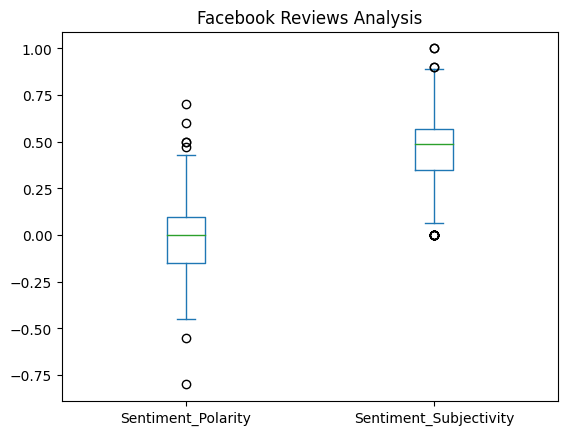

In [56]:
# Chart - 6 
# Sentiment chart for top app in Social Category (Facebook)
reviews_df[reviews_df['App'] == 'Facebook'].loc[:,["Sentiment_Polarity",'Sentiment_Subjectivity']].sort_values(by='Sentiment_Polarity',ascending=False).plot(kind='box')
plt.title("Facebook Reviews Analysis")

Text(0.5, 1.0, 'Clash of Clans Reviews Analysis')

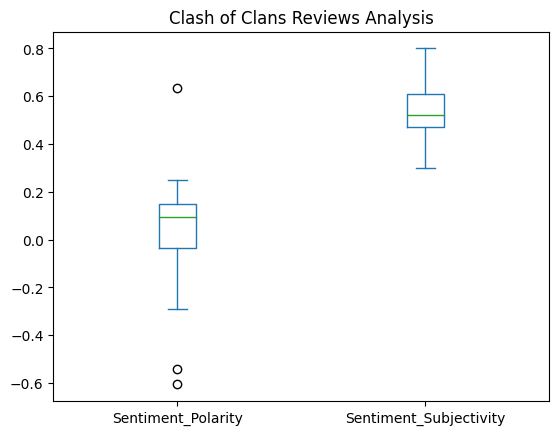

In [57]:
# Sentiment chart for top app in Game Category (Clash of Clans)
reviews_df[reviews_df['App'] == 'Clash of Clans'].loc[:,["Sentiment_Polarity",'Sentiment_Subjectivity']].sort_values(by='Sentiment_Polarity',ascending=False).plot(kind='box')
plt.title("Clash of Clans Reviews Analysis")

Text(0.5, 1.0, 'BBM - Free Calls & Messages Reviews Analysis')

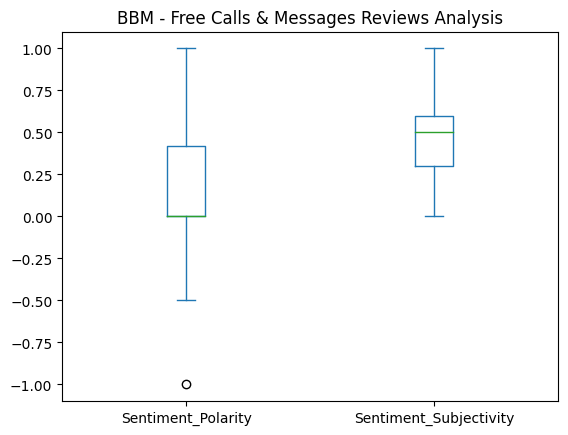

In [58]:
# Sentiment chart for top app in Communication Category (BBM - Free Calls & Messages)
reviews_df[reviews_df['App'] == 'BBM - Free Calls & Messages'].loc[:,["Sentiment_Polarity",'Sentiment_Subjectivity']].sort_values(by='Sentiment_Polarity',ascending=False).plot(kind='box')
plt.title("BBM - Free Calls & Messages Reviews Analysis")

##### 1. Why did you pick the specific chart?

Box plots are used to show quarterly analysis of datasets. It show in what proportion (25%, 50%, 75%) the data is spread. It sometimes helps us find outliers as well.

Hence this plot was used to show how the sentiment polarity and sentiment subjectivity of users for every particular app is spread.

##### 2. What is/are the insight(s) found from the chart?

Users of Clash of Clans and BBM Messenger are more subjective about their review than users of Facebook, because the median of sentiment subjectivity of facebook is lower than that of Clash Of Clans and BBM Messenger. 

Also we see that the sentiment polarity of Facebook is more towards negative side than other two apps.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The top app in Social Category (Facebook) is having more critical reviews. These reviews can be used by the developers to create an app that can address those issues to capture the market of Social category. If Facebook does not take action to address the critical issues it may loose the market share rapidly.

Other apps such as Clash of Clans and BBM Messenger have more positive sentiment. Developers who are willing to start a Game/Communication business can use these feedback to create apps.

#### Chart - 7 - Correlation Heatmap

<Axes: >

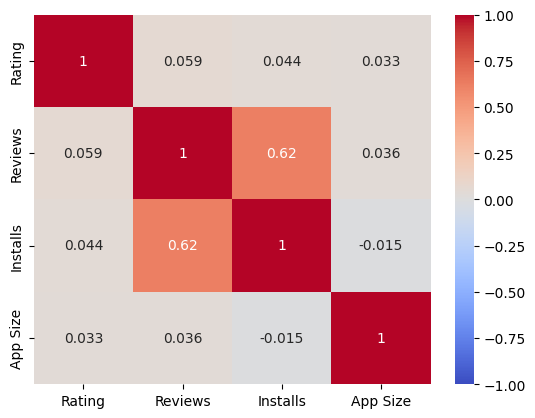

In [59]:
# Correlation Heatmap visualization code
# Visualizing correlation between rating, reviews and installs for FREE apps 
sns.heatmap(filtered_psdf[filtered_psdf['Type']=="Free"].loc[:,['Rating','Reviews','Installs','App Size']].corr(),
            vmin=-1,
            cmap='coolwarm',
            annot = True)

<Axes: >

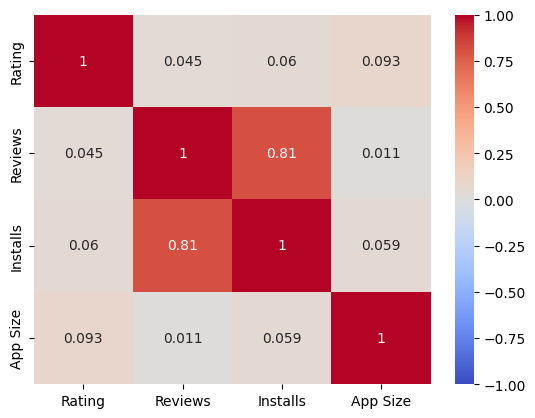

In [60]:
# Visualizing correlation between rating, reviews and installs for PAID apps
sns.heatmap(filtered_psdf[filtered_psdf['Type']=="Paid"].loc[:,['Rating','Reviews','Installs','App Size']].corr(),
            vmin=-1,
            cmap='coolwarm',
            annot = True)

[Text(0.5, 1.0, 'Facebook Correlation')]

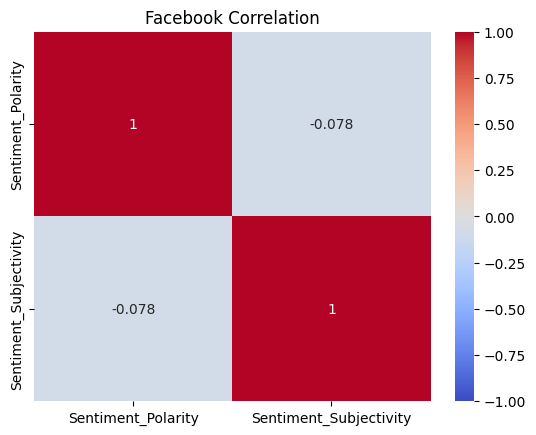

In [61]:
# Visualizing Correlation between Sentiment polarity and sentiment subjectivity of Facebook
sns.heatmap(reviews_df[reviews_df["App"] == "Facebook"].loc[:,['Sentiment_Polarity',"Sentiment_Subjectivity"]].corr(),
            vmin=-1,
            cmap='coolwarm',
            annot = True).set(title="Facebook Correlation")

[Text(0.5, 1.0, 'Clash of Clans Correlation')]

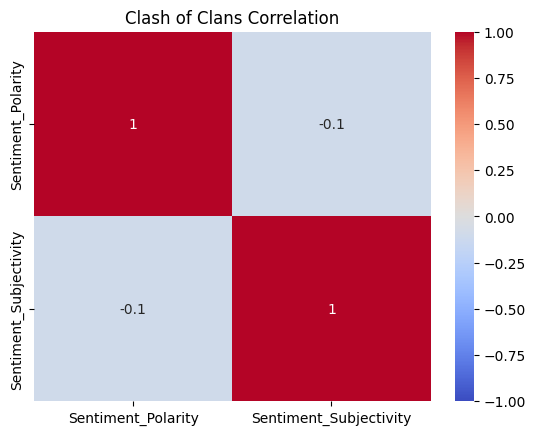

In [62]:
# Visualizing correlation sentiment polarity and subjectivity for Clash of Clans app
sns.heatmap(reviews_df[reviews_df["App"] == "Clash of Clans"].loc[:,['Sentiment_Polarity',"Sentiment_Subjectivity"]].corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True).set(title="Clash of Clans Correlation")

[Text(0.5, 1.0, 'BBM - Free Calls & Messages Correlation')]

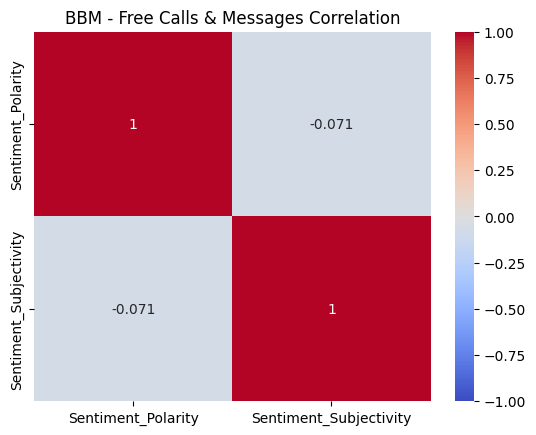

In [63]:
# Visualizing correlation between sentiment polarity and subjectivity for BBM - Free Calls & Messages
sns.heatmap(reviews_df[reviews_df["App"] == "BBM - Free Calls & Messages"].loc[:,['Sentiment_Polarity',"Sentiment_Subjectivity"]].corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True).set(title="BBM - Free Calls & Messages Correlation")

##### 1. Why did you pick the specific chart?

Correlation heatmaps are generally used to represent a relation between two or more variables in a dataset. 

Hence a correlation heatmap was used to identify relation between variables such as reviews, rating, installs, sentiment polarity and sentiment subjectivity.

##### 2. What is/are the insight(s) found from the chart?

We learn that there is great correlation between number of installs and reviews in free apps. And the correlation between installs and reviews increases more with paid apps category.

Also we see that correlation between sentiment polarity and subjectivity of facebook is very less. Yet we can tell that it is inversly proportional to each other as the correlation between sentiment polarity and subectivity is in negative. Same is the case in Clash of Clans and BBM Messenger apps.

#### Chart - 8 - Pair Plot 

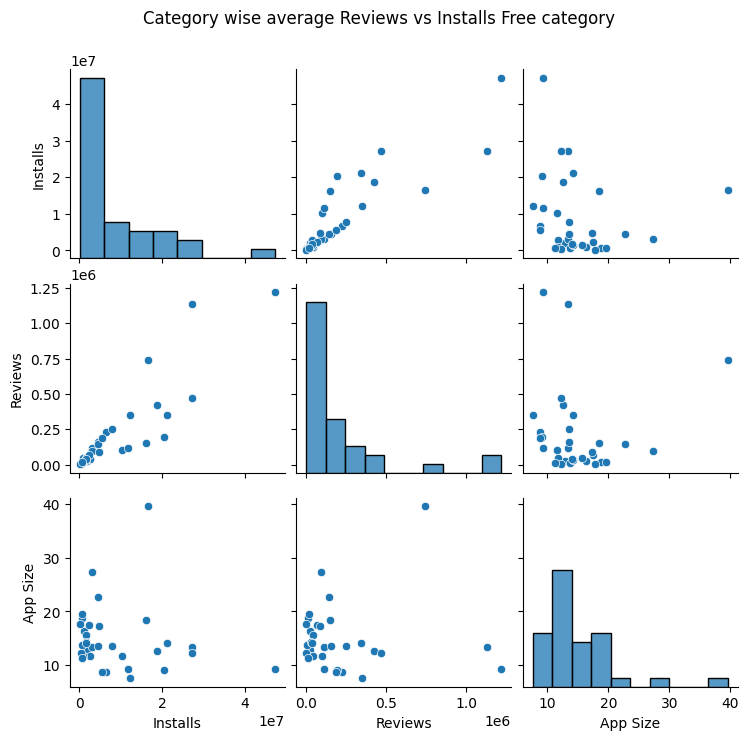

In [64]:
# Pair Plot visualization code
# Visualizing reviews category wise
data=filtered_psdf[filtered_psdf['Type'] == 'Free'].groupby("Category").agg({"Installs":"mean","Reviews":"mean","App Size":"mean"})
grf = sns.pairplot(data)
grf.fig.suptitle('Category wise average Reviews vs Installs Free category')
grf.fig.subplots_adjust(top=.9)

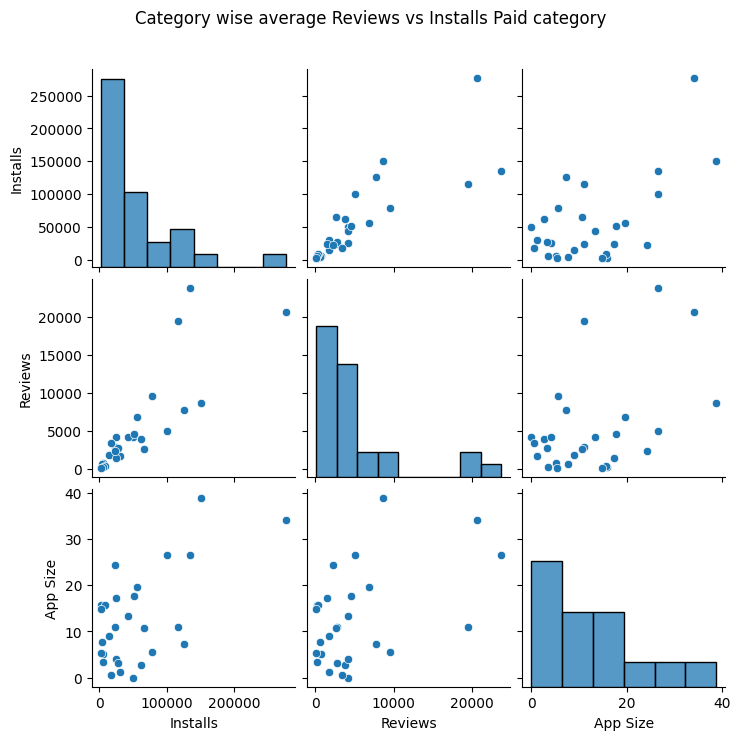

In [65]:
data=filtered_psdf[filtered_psdf['Type'] == 'Paid'].groupby("Category").agg({"Installs":"mean","Reviews":"mean","App Size":"mean"})
grf = sns.pairplot(data)
grf.fig.suptitle('Category wise average Reviews vs Installs Paid category')
grf.fig.subplots_adjust(top=.9)

##### 1. Why did you pick the specific chart?

Pair plots are used to determine the most distinct clusters or the best combination of features to describe a connection between two variables. By creating some straightforward linear separations or basic lines in our data set, it also helps to create some straightforward classification models.

In order to assess the data patterns and relationships between the features, I employed a pair plot. Although you will see a graphical depiction here, it is precisely the same as the correlation map.

##### 2. What is/are the insight(s) found from the chart?

From the above charts I have learned that there is a linear relationshipt between Installs and reviews in the free category. 

This linear relationship is more evident between these two variable when visualized for paid category.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 

**Suggestion for app engagement and success are as follows :-**

* Create and upload apps for Social, Communication or Games category
* Avoid creating apps for Family category as there is too much competition and very less user engagement
* Give users the option to enable/disable new features
* Regularly update the app to comply with latest standards of Google play store so that users with latest OS version have app availability
* Ensure that app size is in the range of 10 to 20 MB for optimal user experience
* Ensure that the app has no performance issues
* Address technical glitch/malfunctioning as quickly as possible
* Stay competitive

# **Conclusion**

**Solution for app engagement and success**
* An app that belongs to Social, Communication or Games category has higher chance of success and engagement as there are high number of reviews and installs in these categories
* Apps with more set of customizations and features have better chance of success
* Apps that support different versions of OS'es with multiple APK versions also have higher chances of success because they provide more optimum user experience
* App Apks that belong to range of 10 to 20 MB have more reviews
* Developers that address issues faced by users by taking action based on critical reviews have more chance of success

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***